In [ ]:
!pip install DBF

In [ ]:
import pandas as pd
import numpy as np
from dbfread import DBF

In [10]:
pate95=pd.read_csv("C:\\Users\\acer\\Downloads\\pate_kiunga_mangrove_extent_1995.csv")

In [11]:
pate95.head()

,FID,the_geom,fid,Area_Ha,Area_Pate,Total,Year,Author,Title,Feature
0,pate_kiunga_mangrove_extent_1995.1,MULTIPOLYGON (((40.97839051667045 -2.196781652...,2,4592.680532,9974.789198,14567.46973,1995,"Delsol, J.P (1995) Vegetation Map of Kenya. a...",A Vegetation Map of Kenya,Mangrove


In [15]:
pate95.dtypes

FID           object
the_geom      object
fid            int64
Area_Ha      float64
Area_Pate    float64
Total        float64
Year           int64
Author        object
Title         object
Feature       object
dtype: object

In [17]:
pate95.at[0,'the_geom']

'MULTIPOLYGON (((40.97839051667045 -2.196781652387553, 40.97783293890993 -2.1973392324476624, 40.97678072762473 -2.1962240780307645, 40.97650193568915 -2.1956664995571624, 40.97622314394614 -2.1951718740080643, 40.97594434945766 -2.1937779275299043, 40.97650192171276 -2.191088956010578, 40.97650191754141 -2.1897219886389143, 40.97811170487344 -2.18972198366698, 40.97811170649323 -2.1902525830345096, 40.97839049842634 -2.190810160508291, 40.978669296722444 -2.193777919107308, 40.97839051667045 -2.196781652387553)), ((40.97836348866458 -2.181061521214947, 40.978642281332704 -2.1818619164005852, 40.978921074029145 -2.1826713045752624, 40.97919986484836 -2.183192910092655, 40.97947865677778 -2.1837504875669684, 40.97972147652872 -2.1845868558194996, 40.97947866168896 -2.185360272646651, 40.979199872310346 -2.18563906217506, 40.97864229370205 -2.1859178535642028, 40.9781116924148 -2.1856390655347187, 40.977832902334825 -2.185360277727528, 40.977590079376654 -2.183471703727779, 40.9775900736

In [1]:
! pip install geopandas

  Using cached geopandas-0.13.2-py3-none-any.whl (1.1 MB)
  Using cached shapely-2.0.1-cp39-cp39-win_amd64.whl (1.4 MB)
  Using cached pyproj-3.6.0-cp39-cp39-win_amd64.whl (5.8 MB)
  Using cached Fiona-1.9.4.post1-cp39-cp39-win_amd64.whl (22.7 MB)
  Using cached cligj-0.7.2-py3-none-any.whl (7.1 kB)
  Using cached click_plugins-1.1.1-py2.py3-none-any.whl (7.5 kB)


In [3]:
import geopandas as gpd
from shapely import wkt

In [14]:
pate95['geometry']=pate95['the_geom'].apply(lambda x: wkt.dumps(x))
pate95['geometry']=pate95['geometry'].apply(wkt.loads)
gpate95=gpd.GeoDataFrame(pate95,crs='epsg:4326')

<AxesSubplot:>

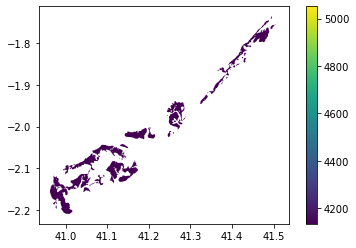

In [15]:
gpate95.plot("Area_Ha",legend=True)

In [20]:
gpate95.explore('Area_Ha',legend=False)

TypeError: Object of type MultiPolygon is not JSON serializable

In [18]:
! pip install folium matplotlib mapclassify

  Using cached folium-0.14.0-py2.py3-none-any.whl (102 kB)
  Using cached mapclassify-2.5.0-py3-none-any.whl (39 kB)
  Using cached branca-0.6.0-py3-none-any.whl (24 kB)


In [21]:
import folium


In [25]:
import shapely.geometry as sg

gpate95_1=gpate95.copy()
gpate95_1['geometry'] = gpate95_1['geometry'].apply(lambda geom: sg.MultiPolygon(geom).convex_hull)
gpate95_1_geojson = gpate95_1.to_json()
gpate95_1['geometry'] = gpate95_1['geometry'].apply(lambda geom: sg.MultiPolygon(geom))
#gpate95_geojson=gpate95.to_crs(epsg='4326').to_json()
m=folium.Map(location=[0,0],zoom_start=2)
folium.GeoJson(gpate95_1_geojson).add_to(m)

TypeError: 'Polygon' object is not iterable

In [27]:
import shapely.geometry as sg

In [28]:
gpate95_1=gpate95.copy()

In [29]:
# Convert Polygon and MultiPolygon geometries to their convex hull
gpate95_1['geometry'] = gpate95_1['geometry'].apply(lambda geom: geom.convex_hull if geom.type == 'Polygon' else geom[0].convex_hull)

# Convert to GeoJSON
gpate95_1_geojson = gpate95_1.to_json()

# Restore the original geometries
gpate95_1['geometry'] = gpate95_1['geometry'].apply(lambda geom: geom)

# Continue with the rest of your code
m = folium.Map(location=[0, 0], zoom_start=2)
folium.GeoJson(gpate95_1_geojson).add_to(m)

C:\Users\acer\AppData\Local\Temp\ipykernel_10868\370280642.py:2: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  gpate95_1['geometry'] = gpate95_1['geometry'].apply(lambda geom: geom.convex_hull if geom.type == 'Polygon' else geom[0].convex_hull)


TypeError: Object of type MultiPolygon is not JSON serializable

In [30]:
# Convert MultiPolygon geometries to a list of Polygon geometries
gpate95_1['geometry'] = gpate95_1['geometry'].apply(lambda geom: [sg.Polygon(poly) for poly in geom])

# Convert to GeoJSON
gpate95_1_geojson = gpate95_1.to_json()

# Restore the original geometries
gpate95_1['geometry'] = gpate95_1['geometry'].apply(lambda geom: sg.MultiPolygon(geom))

# Continue with the rest of your code
m = folium.Map(location=[0, 0], zoom_start=2)
folium.GeoJson(gpate95_1_geojson).add_to(m)

TypeError: 'Polygon' object is not iterable

In [31]:
gpate95_1_geojson = gpate95_1.to_json()

# Continue with the rest of your code
m = folium.Map(location=[0, 0], zoom_start=2)
folium.GeoJson(gpate95_1_geojson).add_to(m)

TypeError: Object of type MultiPolygon is not JSON serializable